<a href="https://colab.research.google.com/github/neonithinar/ML_and_DL_learning_materials_and_tryouts/blob/master/Classification_Mnist_O_Rieley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Mnist dataset, first block is long and done in pycharm


In [ ]:
from sklearn.datasets import fetch_openml
from scipy.io import loadmat
import matplotlib as mpl
import matplotlib.pyplot as plt
import joblib
import numpy as np

#save_loc = 'D:/Machine Learning/in python/House price'
mnist = fetch_openml('mnist_784', version=1) #data_home = save_loc)

#mnist = loadmat('D:/Machine Learning/in python/mnist.mat')
print(mnist.keys())
X, y = mnist["data"], mnist["target"]
#X = np.transpose(X)
#y = np.transpose(y)
print(X.shape, y.shape)



dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])
(70000, 784) (70000,)


In [ ]:

#   PLOTTING A RANDOM DIGIT
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X[0]
#some_digit_image = some_digit.reshape(28, 28)
#plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
#plt.axis("off")
#plt.show()

#   y vector is saved as string, so converting the set into numbers

y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)


#   STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

# model save with joblib
#sgd_clf_file = "D:/Machine Learning/in python/House price/saved models/mnist_sgd_clf.pkl"
#joblib.dump(sgd_clf, sgd_clf_file)

#   Loading the saved model from the classifier

#sgd_clf_model = joblib.load(sgd_clf_file)


#test  of the model
print(sgd_clf.predict([some_digit]))

#   PERFORM STRATIFIED K-FOLD CROSS_VAL SPLIT
#from sklearn.model_selection import StratifiedKFold
#from sklearn.base import clone

#skfolds = StratifiedKFold(n_splits = 3, random_state = 42)

#for train_index, test_index in skfolds.split(X_train, y_train_5):
 #   clone_clf = clone(sgd_clf)
#    X_train_folds = X_train[train_index]
#    y_train_folds = y_train_5[train_index]
##   X_test_fold = X_train[test_index]
#    y_test_fold = y_train_5[test_index]

#    clone_clf.fit(X_train_folds, y_train_folds)
 #   y_pred = clone_clf.predict(X_test_fold)
#    n_correct = sum(y_pred == y_test_fold)
#    print(n_correct/ len(y_pred))

from sklearn.model_selection import cross_val_score
#print(cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy"))

from sklearn.model_selection import cross_val_predict
#y_train_pred = cross_val_predict(sgd_clf_model, X_train, y_train_5, cv=3)
#print(y_train_pred)

#   CONFUSION MATRIX

#from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_train_5, y_train_pred))

#CONFUSION METRIC AGAINST OWN CLASS (SAME CLASSIFIER, PERFECT PREDICTOR)

# y_train_perfect_predictions = y_train_5 # pretend we reached perfection
#confusion_matrix(y_train_5, y_train_perfect_predictions)

#    PRESCISION AND RECALL
#from sklearn.metrics import precision_score, recall_score
#precision_score(y_train_5, y_train_pred)
#recall_score(y_train_5, y_train_pred)

#from sklearn.metrics import f1_score
#f1_score(y_train_5, y_train_pred)

#   decision function scores for the SGD classifier

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = "decision_function")



[ True]


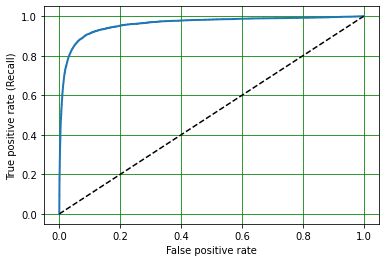

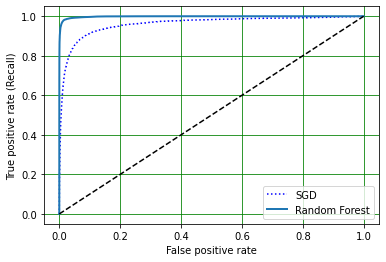

In [ ]:
#   calculating and plotting precision recall curve

#from sklearn.metrics import precision_recall_curve
#precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

#def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
#    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
#    plt.plot(thresholds, recalls[:-1], "g--", label = "Recall")
#    plt.legend()
#    plt.xlabel("Threshold")
#    plt.grid(color = 'g', linestyle = '-')




#plot_precision_recall_vs_threshold(precisions,recalls, thresholds)
#plt.show()

#   THE ROC CURVE
# Receiver operating characteristic Curve
# to be used when there are many positive class and we care more abt false negatives than false positives

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

#plotting roc curve using matplotlib

def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1], [0,1], 'k--') #dashed diagonal
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate (Recall)")
    plt.grid(color = 'g', linestyle = '-')

plot_roc_curve(fpr, tpr)
plt.show()

#from sklearn.metrics import roc_auc_score
#print(roc_auc_score(y_train_5, y_scores))


#comparing the roc_curve for random forest classifier
# unhash the roc curve plotting function above

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state= 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, method = 'predict_proba')

# the above returns the probabilities for the classifier, so to make them into scores,
y_scores_forest = y_probas_forest[:, 1] #taking only the score = proba for the positive class

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

#plotting
plt.plot(fpr, tpr, "b:", label = "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc = "lower right")
plt.show()

MULTI CLASS CLASSIFIER



In [ ]:
sgd_clf.fit(X_train, y_train) # y_train, not y_train_5
sgd_clf.predict([some_digit])


array([3], dtype=uint8)

In [ ]:
some_digit_scores = sgd_clf.decision_function([some_digit])
print(some_digit_scores)
np.argmax(some_digit_scores)


[[-31893.03095419 -34419.69069632  -9530.63950739   1823.73154031
  -22320.14822878  -1385.80478895 -26188.91070951 -16147.51323997
   -4604.35491274 -12050.767298  ]]


3

In [ ]:
print(sgd_clf.classes_)

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
forest_clf.fit(X_train, y_train)
print(forest_clf.predict([some_digit]))
print(forest_clf.predict_proba([some_digit]))

[5]
[[0.   0.   0.01 0.08 0.   0.9  0.   0.   0.   0.01]]


In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy"))


[0.87365 0.85835 0.8689 ]


ERROR ANALYSIS:

plot cross_val_predict and confusion matrix

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
print(cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy"))

from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)
conf_mx = confusion_matrix(y_train, y_train_pred)
plt.matshow(conf_mx, cmap= plt.cm.gray)
plt.show()
row_sums = conf_mx(axis = 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)


KeyboardInterrupt: ignored

MULTI LABEL CLASSIFICATION

K_Neighbours classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


# New Section

In [ ]:
y_train_large  = (y_train >= 7)
y_train_odd = (y_train % 2 ==1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)
print(knn_clf.predict([some_digit]))


[[False  True]]


EVALUATION METRIC FOR MULTILABEL CLASSIFICATION

can use F1 score, but it may assume all the classes of equal importance, Which maynot be the case. . one method is to  give more weight to the classifier's score on the class , ie, give each label a weight equal to its support


In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv = 3)
print(f1_score(y_multilabel, y_train_knn_pred, average = "macro") #change average = "weighted" if need weighted clalculation

MULTIOUTPUT CLASSIFICATION

First build a system that removes noise from the images

In [ ]:
noise = np.random.randint(0, 100, (len(X_train)), 784)
X_trian_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test)), 784)
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])



TypeError: ignored